<div style="Tamplaged                                                                              ">
<b><center><font size="4">Practical Project 2</font></center></b>
<b><center><font size="3">Classification</font></center></b>
<b><center><font size="2">MNIST Dataset</font></center></b>


</div>

**Notebook Developed by**: [Rene Jerez](https://github.com/renejerez)<br>
**email:**  rene.jerez@ubi.pt<br>

<h1>Classsification MNIST<span class="tocSkip"></span></h1>
<div class="toc">
  <ul class="toc-item">
    <li><span><a href="#Setup-and-Load-Data" data-toc-modified-id="Setup-and-Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup and Load Data</a></span>
      <div class="toc">
        <ul class="toc-item">
    <li><span><a href="#Install-Libraries" data-toc-modified-id="Install-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Install Libraries</a></span>
    </li>
    <li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import Libraries</a></span>
    </li>
    <li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load Data</a></span>
    </li>
    <li><span><a href="#Transformed-Data" data-toc-modified-id="Transformed-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Transformed Data</a></span>
    </li>
        </ul>
      </div>
    </li>
    <li><span><a href="Implement-a-classification-model" data-toc-modified-id="Implement-a-classification-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Implement a classification model</a></span>
      <div class="toc">
        <ul class="toc-item">
    <li><span><a href="#Architecture-based-on-the-doc-from-Tutorial/Resource" data-toc-modified-id="Architecture-based-on-the-doc-from-Tutorial/Resource-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Architecture based on the doc from Tutorial/Resource</a></span>
      <div class="toc">
        <ul class="toc-item">
    <li><span><a href="#Architecture-based-on-the-doc-from-Tutorial/Resource" data-toc-modified-id="Architecture-based-on-the-doc-from-Tutorial/Resource-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Architecture based on the doc from Tutorial/Resource</a></span>
    </li>
    <li><span><a href="#Architecture-based-on-the-topology-recommended" data-toc-modified-id="Architecture-based-on-the-topology-recommended-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Architecture based on the topology recommended</a></span>
    </li>
    <li><span><a href="#Architecture-based-on-function-activate-LeakyReLU" data-toc-modified-id="Architecture-based-on-function-activate-LeakyReLU-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Architecture based on function activate LeakyReLU</a></span>
    </li>
        </ul>
      </div>
    </li>
    <li><span><a href="#Train-Networks" data-toc-modified-id="Train-Networks-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Train Networks</a></span>
    </li>
        </ul>
      </div>
    </li>
    <li><span><a href="#Results" data-toc-modified-id="Results-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Results</a></span>
      <div class="toc">
        <ul class="toc-item">
    <li><span><a href="#Table-to-compare-the-6-models" data-toc-modified-id="Table-to-compare-the-6-models-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Table to compare the 6 models</a></span>
    </li>
    <li><span><a href="#Chart-to-see-the-6-model-with-Train-and-Test-data" data-toc-modified-id="Chart-to-see-the-6-model-with-Train-and-Test-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Chart to see the 6 model with Train and Test data</a></span>
    </li>
        </ul>
      </div>
    </li>
  </ul>
</div>

## Setup and Load Data

In [4]:
##########################################################
# Contains Solutions and Notes based on Machine Learning Specialization by Andrew NG
##########################################################

### Install libraries

In [5]:
!pip install tensorflow

### Import libraries

In [40]:
##########################################################
# Import Libraries to start work
##########################################################
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import argparse
import sklearn as sk
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import tensorflow as tf
from IPython.display import Image



### Load Data

In [7]:
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-o", "--output", required=False, help="path to the output loss/accuracy plot")
args, unknown = ap.parse_known_args()



In [8]:
##########################################################
# Function to load mnist dataset
##########################################################
# grab the MNIST dataset 
((trainX, trainY), (testX, testY)) = mnist.load_data()


### Transformed Data

In [9]:
##########################################################
# Flatten the image to be simple list of 28x28=784 pixels
##########################################################
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

In [10]:
##########################################################
# scale data to the range of [0, 1]
##########################################################
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [11]:

##########################################################
# convert the labels from integers to vectors
##########################################################
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

## Implement a classification model

### Define Network Architecture

#### Architecture based on the doc from Tutorial/Resource

In [33]:
##########################################################
# Define large model architectures using Keras
##########################################################
def create_model_large(activation):
    model = Sequential([
        Dense(256, input_shape=(784,), activation=activation),
        Dense(128, activation=activation),
        Dense(10, activation="softmax")
    ])
    return model


#### Architecture based on the topology recommended

In [34]:
##########################################################
# Define small model architectures using Keras
##########################################################
def create_model_small(activation):
    model = Sequential([
        Dense(5, input_shape=(784,), activation=activation),
        Dense(3, activation=activation),
        Dense(10, activation="softmax")
    ])
    return model

#### Architecture based on function activate LeakyReLU

In [35]:
##########################################################
# Define large model architectures using LeakyReLU Keras
##########################################################
def create_model_large_leaky():
    model = Sequential([
        Dense(256, input_shape=(784,)),
        LeakyReLU(alpha=0.01),
        Dense(128),
        LeakyReLU(alpha=0.01),
        Dense(10, activation="softmax")
    ])
    return model


In [36]:
##########################################################
# Define small model architectures using LeakyReLU Keras
##########################################################
def create_model_small_leaky():
    model = Sequential([
        Dense(5, input_shape=(784,)),
        LeakyReLU(alpha=0.01),
        Dense(3),
        LeakyReLU(alpha=0.01),
        Dense(10, activation="softmax")
    ])
    return model

### Train Networks

In [37]:
##########################################################
# # Compile and train the model
##########################################################
def compile_and_train(model, trainX, trainY, testX, testY, epochs=20, batch_size=128):
    model.compile(optimizer=SGD(0.01), loss="categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=batch_size, verbose=0)
    return history

In [38]:
##########################################################
# Train all models
##########################################################
histories = {
    "Sigmoid Large": compile_and_train(create_model_large("sigmoid"), trainX, trainY, testX, testY),
    "Sigmoid Small": compile_and_train(create_model_small("sigmoid"), trainX, trainY, testX, testY),
    "ReLU Large": compile_and_train(create_model_large("relu"), trainX, trainY, testX, testY),
    "ReLU Small": compile_and_train(create_model_small("relu"), trainX, trainY, testX, testY),
    "Leaky ReLU Large": compile_and_train(create_model_large_leaky(), trainX, trainY, testX, testY),
    "Leaky ReLU Small": compile_and_train(create_model_small_leaky(), trainX, trainY, testX, testY)
}

c:\Users\rene_\anaconda3\envs\scraper\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\rene_\anaconda3\envs\scraper\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


## Results

### Table to compare the 6 models

In [41]:
##########################################################
# Comparison table with the accuracy
##########################################################
comparison_data = []
for name, history in histories.items():
    final_train_acc = history.history["accuracy"][-1]
    final_test_acc = history.history["val_accuracy"][-1]
    final_train_loss = history.history["loss"][-1]
    final_test_loss = history.history["val_loss"][-1]
    comparison_data.append([name, final_train_acc, final_test_acc, final_train_loss, final_test_loss])

comparison_df = pd.DataFrame(comparison_data, columns=["Model", "Train Accuracy", "Test Accuracy", "Train Loss", "Test Loss"])
print(comparison_df)

              Model  Train Accuracy  Test Accuracy  Train Loss  Test Loss
0     Sigmoid Large        0.866200         0.8733    0.505031   0.482196
1     Sigmoid Small        0.425333         0.4318    1.786263   1.771399
2        ReLU Large        0.955167         0.9533    0.157715   0.159388
3        ReLU Small        0.793067         0.7929    0.768278   0.751430
4  Leaky ReLU Large        0.955717         0.9538    0.156473   0.159815
5  Leaky ReLU Small        0.644000         0.6492    1.108964   1.092275


### Chart to see the 6 model with Train and Test data

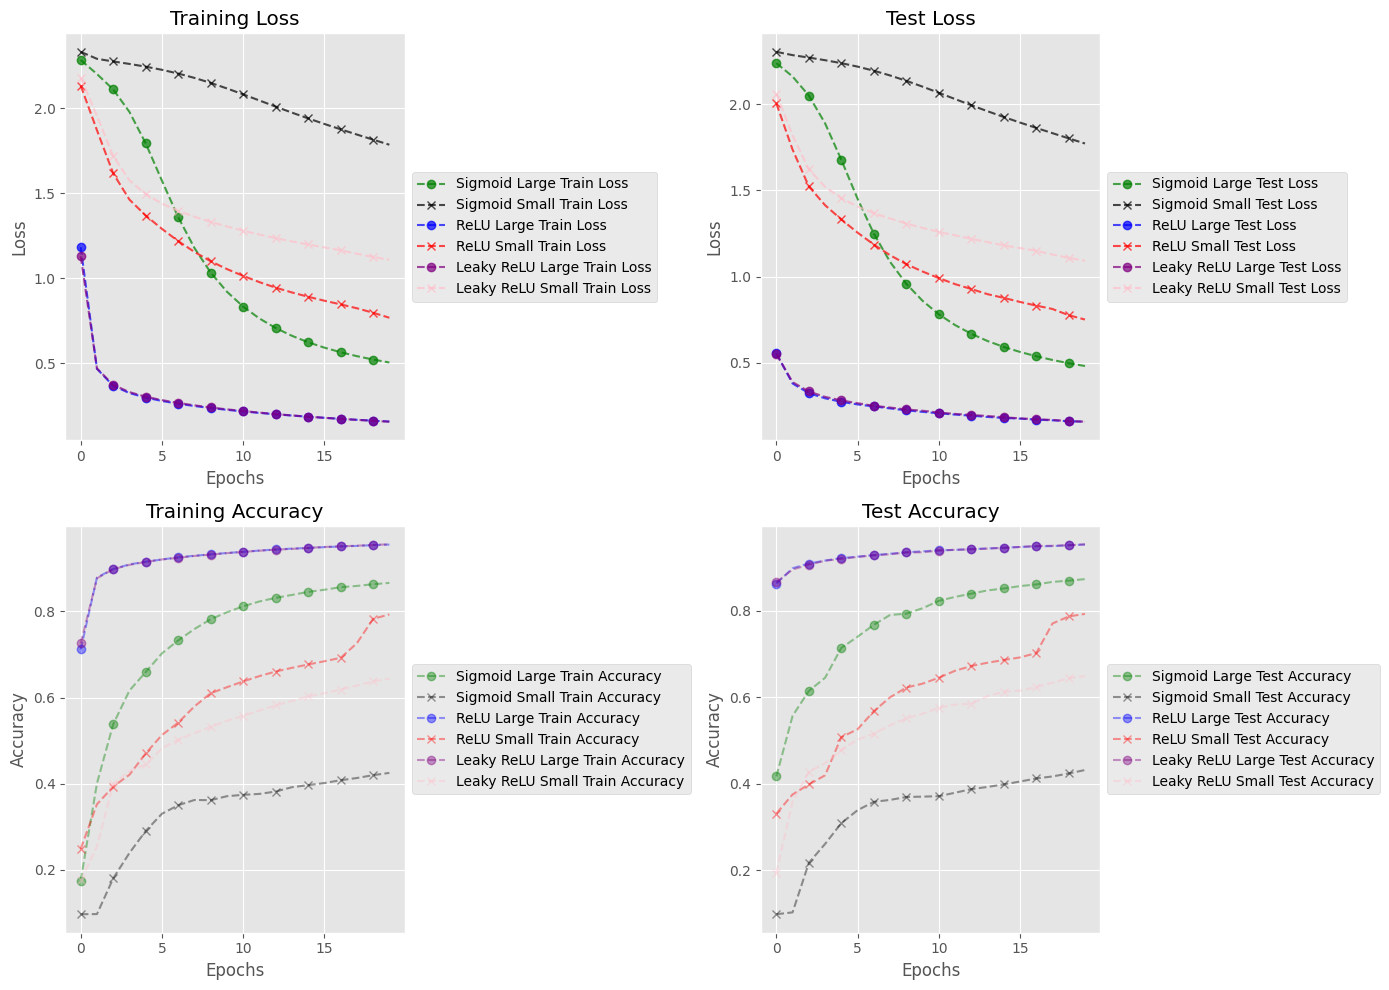

<Figure size 640x480 with 0 Axes>

In [66]:
# Split the plot into 4 subplots for accuracy and loss
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
epochs = range(20)

# Colors dictionary for easy reference
colors = {
    "Sigmoid Large": "green", "Sigmoid Small": "black",
    "ReLU Large": "blue", "ReLU Small": "red",
    "Leaky ReLU Large": "purple", "Leaky ReLU Small": "pink"
}

# Plot Training Loss
for name, history in histories.items():
    linestyle = "solid" if "Train" in name else "dashed"
    marker = "o" if "Large" in name else "x"  # Distinguish large models with markers
    axs[0, 0].plot(epochs, history.history["loss"], label=f"{name} Train Loss", color=colors[name], linestyle=linestyle, marker=marker, markevery=2, alpha=0.7)
axs[0, 0].set_title("Training Loss")
axs[0, 0].set_xlabel("Epochs")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].legend(loc="center left", bbox_to_anchor=(1, 0.5))  # Position legend to the right

# Plot Test Loss
for name, history in histories.items():
    linestyle = "solid" if "Train" in name else "dashed"
    marker = "o" if "Large" in name else "x"  # Distinguish large models with markers
    axs[0, 1].plot(epochs, history.history["val_loss"], label=f"{name} Test Loss", color=colors[name], linestyle=linestyle, marker=marker, markevery=2, alpha=0.7)
axs[0, 1].set_title("Test Loss")
axs[0, 1].set_xlabel("Epochs")
axs[0, 1].set_ylabel("Loss")
axs[0, 1].legend(loc="center left", bbox_to_anchor=(1, 0.5))  # Position legend to the right

# Plot Training Accuracy
for name, history in histories.items():
    linestyle = "solid" if "Train" in name else "dashed"
    marker = "o" if "Large" in name else "x"  # Distinguish large models with markers
    axs[1, 0].plot(epochs, history.history["accuracy"], label=f"{name} Train Accuracy", color=colors[name], linestyle=linestyle, marker=marker, markevery=2, alpha=0.4)
axs[1, 0].set_title("Training Accuracy")
axs[1, 0].set_xlabel("Epochs")
axs[1, 0].set_ylabel("Accuracy")
axs[1, 0].legend(loc="center left", bbox_to_anchor=(1, 0.5))  # Position legend to the right

# Plot Test Accuracy
for name, history in histories.items():
    linestyle = "solid" if "Train" in name else "dashed"
    marker = "o" if "Large" in name else "x"  # Distinguish large models with markers
    axs[1, 1].plot(epochs, history.history["val_accuracy"], label=f"{name} Test Accuracy", color=colors[name], linestyle=linestyle, marker=marker, markevery=2, alpha=0.4)
axs[1, 1].set_title("Test Accuracy")
axs[1, 1].set_xlabel("Epochs")
axs[1, 1].set_ylabel("Accuracy")
axs[1, 1].legend(loc="center left", bbox_to_anchor=(1, 0.5))  # Position legend to the right

# Adjust layout and show plot
plt.tight_layout()
plt.show()
plt.savefig("compare_plot.png")  # Save the plot with annotations


## The best model choosen to make a variable topology

### Call the Leaky ReLU Model and select how many layers you want

In [ ]:
!python classification.py --topology 938256

### Final Result

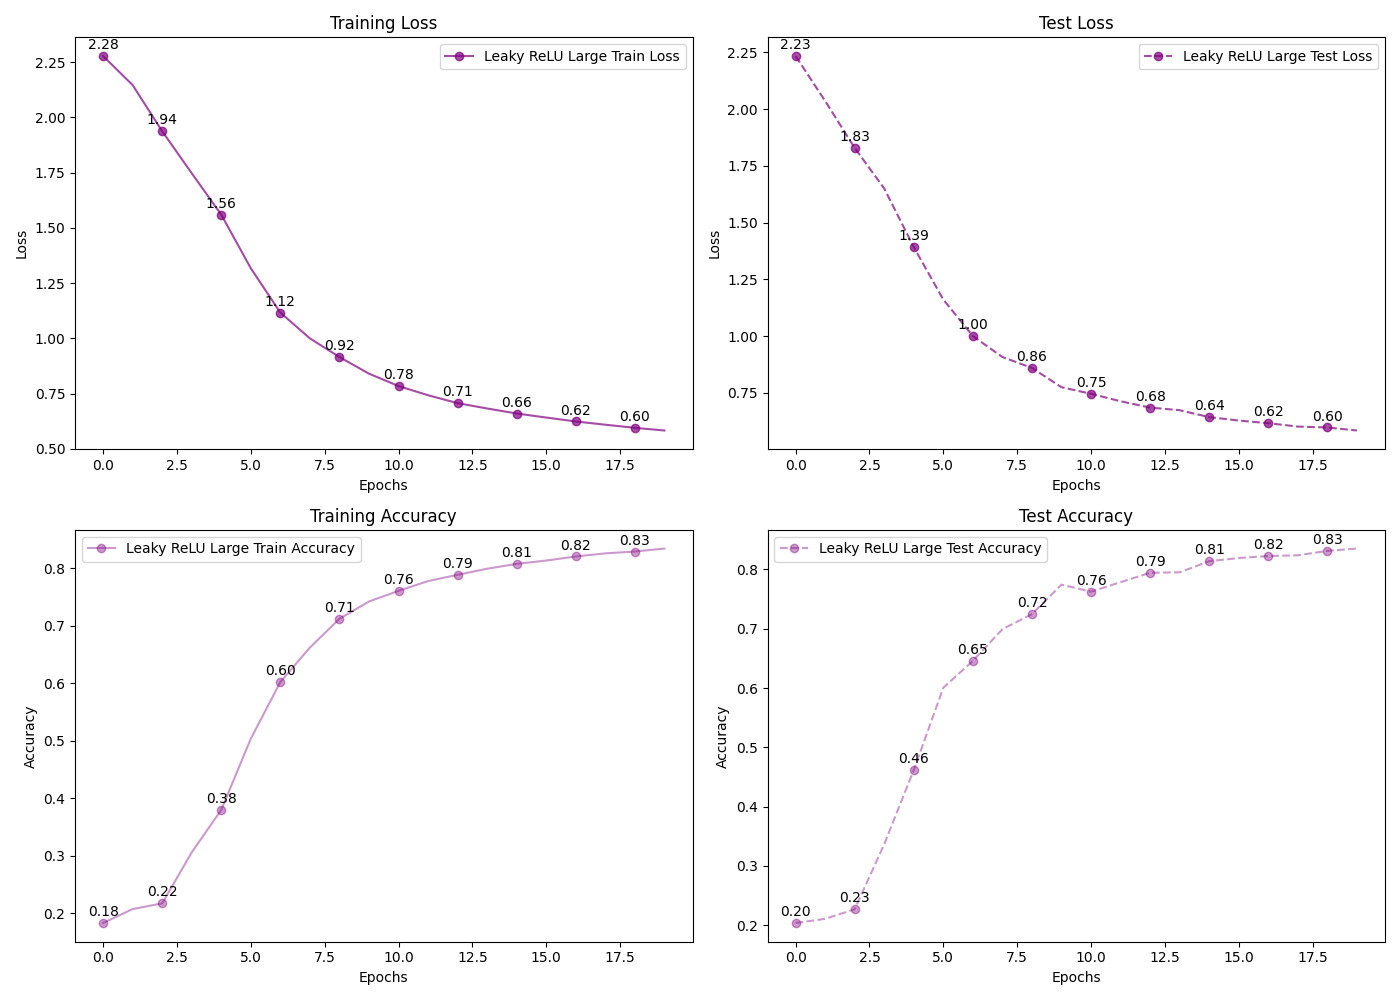

In [61]:
Image(filename="leaky_relu_plot.png")